<a href="https://colab.research.google.com/github/rbutti/machine-learning-cohort/blob/main/HyperParms_JPMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import neighbors
# initialize with default hyperparameters
knn = neighbors.KNeighborsClassifier()
# examine the defaults
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [ ]:
?knn

In [ ]:
"""
initialize with k = 15 and all other hyperparameters as default
"""
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
# examine
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


In [ ]:
"""
initialize with k = 15 and all other hyperparameters as default
"""
knn = neighbors.KNeighborsClassifier(n_neighbors=15, weights='distance')
# examine
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}


In [ ]:
from sklearn import neighbors, datasets, model_selection

In [ ]:
# dataset
cancer = datasets.load_breast_cancer()
# target
y = cancer.target
# features
X = cancer.data

In [ ]:
import pandas as pd

In [ ]:
X


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
# no arguments specified
knn = neighbors.KNeighborsClassifier()

In [ ]:
# 10 folds, scored on precision
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
cv

array([0.91666667, 0.85      , 0.91666667, 0.94736842, 0.94594595,
       0.94444444, 0.97222222, 0.92105263, 0.96969697, 0.97142857])

In [ ]:
round(cv.mean(),2)

0.94

In [ ]:
def evaluate_knn(k):
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  cv = model_selection.cross_val_score(knn, X, y, cv=10,scoring='precision')
  print(round(cv.mean(), 2))
evaluate_knn(k=7)
evaluate_knn(k=3)
evaluate_knn(k=1)

0.93
0.93
0.92


In [ ]:
# k =5, weights evaluated using distance
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
print(round(cv.mean(), 2))

0.93


In [ ]:
from sklearn import neighbors, datasets, model_selection
# load data
cancer = datasets.load_breast_cancer()
# target
y = cancer.target
# features
X = cancer.data
# hyperparameter grid
grid = {'k': [1, 3, 5, 7]}

In [ ]:
# for every value of k in the grid
for k in grid['k']:
  # initialize the knn estimator
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  # conduct a 10-fold cross-validation
  cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
  # calculate the average precision value over all folds
  cv_mean = round(cv.mean(), 3)
  # report the result
  print('With k = {}, mean precision = {}'.format(k, cv_mean))

With k = 1, mean precision = 0.919
With k = 3, mean precision = 0.928
With k = 5, mean precision = 0.936
With k = 7, mean precision = 0.931


In [ ]:
# for every value of k in the grid 
for k in grid['k']:
  # initialize the knn estimator
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  # print the hyperparameterization
  print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [ ]:
# hyperparameter grid
grid = {'k': [1, 3, 5, 7],'weight_function': ['uniform', 'distance']}
# for every value of k in the grid
for k in grid['k']:
  # and every possible weight_function in the grid 
  for weight_function in grid['weight_function']:
    # initialize the knn estimator
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight_function)
    # conduct a 10-fold cross-validation
    cv = model_selection.cross_val_score(knn, X, y, cv=10,scoring='precision')
    # calculate the average precision value over all folds
    cv_mean = round(cv.mean(), 3)
    # report the result
    print('With k = {} and weight function = {}, ''mean precision = {}'.format(k, weight_function, cv_mean))

With k = 1 and weight function = uniform, mean precision = 0.919
With k = 1 and weight function = distance, mean precision = 0.919
With k = 3 and weight function = uniform, mean precision = 0.928
With k = 3 and weight function = distance, mean precision = 0.929
With k = 5 and weight function = uniform, mean precision = 0.936
With k = 5 and weight function = distance, mean precision = 0.93
With k = 7 and weight function = uniform, mean precision = 0.931
With k = 7 and weight function = distance, mean precision = 0.926


# GridSearchCV

In [ ]:
from sklearn import model_selection, datasets, neighbors
# load the data
cancer = datasets.load_breast_cancer()
# target
y = cancer.target
# features
X = cancer.data

In [ ]:
# initialize the estimator
knn = neighbors.KNeighborsClassifier()

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# grid contains k and the weight function
grid = {'n_neighbors': [1, 3, 5, 7],'weights': ['uniform', 'distance']}

In [ ]:
"""
 set up the grid search with scoring on precision and 
number of folds = 10
"""
gscv = model_selection.GridSearchCV(estimator=knn, param_grid=grid, scoring='precision', cv=10)
# start the search
gscv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [ ]:
gscv.cv_results_

{'mean_fit_time': array([0.00068657, 0.00062973, 0.00064995, 0.0006114 , 0.0006583 ,
        0.00060308, 0.0006218 , 0.00060928]),
 'std_fit_time': array([1.08063391e-04, 6.45666433e-05, 3.49226579e-05, 1.95011824e-05,
        9.56224043e-05, 2.10079782e-05, 2.07478965e-05, 2.02749035e-05]),
 'mean_score_time': array([0.00496411, 0.00236466, 0.00413556, 0.00237494, 0.00425513,
        0.00243158, 0.00414054, 0.00243764]),
 'std_score_time': array([2.37740238e-03, 5.48971346e-05, 5.46065786e-05, 8.21862975e-05,
        3.36708238e-04, 5.37673596e-05, 3.04812442e-05, 3.53697478e-05]),
 'param_n_neighbors': masked_array(data=[1, 1, 3, 3, 5, 5, 7, 7],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_weights': masked_array(data=['uniform', 'distance', 'uniform', 'distance',
                    'uniform', 'distance', 'uniform', 'distance'],
              mask=[False, False, False, False, False, False, Fal

In [ ]:
import pandas as pd
# convert the results dictionary to a dataframe
results = pd.DataFrame(gscv.cv_results_)
"""
select just the hyperparameterizations tried, 
the mean test scores, order by score and show the top 5 models
"""
print(results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False).head(5))

                                      params  mean_test_score
4   {'n_neighbors': 5, 'weights': 'uniform'}         0.935549
6   {'n_neighbors': 7, 'weights': 'uniform'}         0.931078
5  {'n_neighbors': 5, 'weights': 'distance'}         0.930463
3  {'n_neighbors': 3, 'weights': 'distance'}         0.928752
2   {'n_neighbors': 3, 'weights': 'uniform'}         0.928438


<Axes: ylabel='params'>

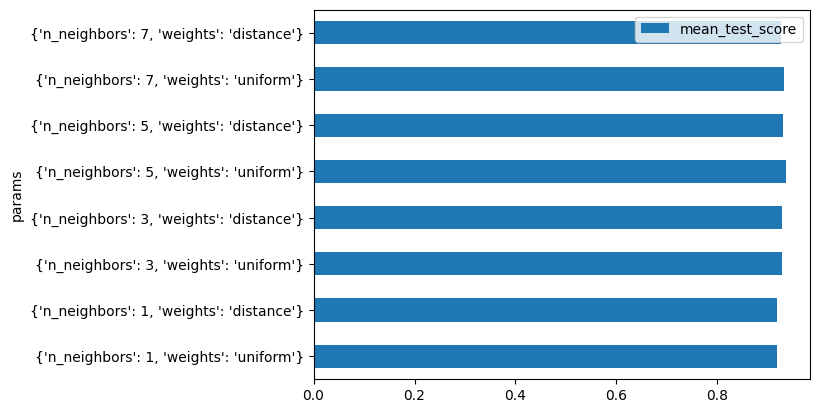

In [ ]:
# visualise the result
results.loc[:,['params','mean_test_score']].plot.barh(x = 'params')

In [ ]:
from sklearn import datasets, svm, model_selection
# load data
digits = datasets.load_digits()
# target
y = digits.target
# features
X = digits.data

In [ ]:
# support vector machine classifier
clr = svm.SVC(gamma='scale')

In [ ]:
clr.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
?clr

In [ ]:
# hyperparameter grid. contains linear and polynomial kernels
grid = [{'kernel': ['linear']},{'kernel': ['poly'], 'degree': [2, 3, 4]}]

In [ ]:
"""
setting up the grid search to score on accuracy and 
evaluate over 10 folds
"""
cv_spec = model_selection.GridSearchCV(estimator=clr, param_grid=grid,scoring='accuracy', cv=10)

In [ ]:
cv_spec.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3, 4], 'kernel': ['poly']}],
             scoring='accuracy')

In [ ]:
# what is the available information
print(cv_spec.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [ ]:
cv_spec.cv_results_['mean_test_score']

array([0.96048727, 0.97049969, 0.97773433, 0.97328367])

In [ ]:
cv_spec.cv_results_['params']

[{'kernel': 'linear'},
 {'degree': 2, 'kernel': 'poly'},
 {'degree': 3, 'kernel': 'poly'},
 {'degree': 4, 'kernel': 'poly'}]

In [ ]:
import pandas as pd
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(cv_spec.cv_results_)
# show hyperparameterizations
print(results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False))

                            params  mean_test_score
2  {'degree': 3, 'kernel': 'poly'}         0.977734
3  {'degree': 4, 'kernel': 'poly'}         0.973284
1  {'degree': 2, 'kernel': 'poly'}         0.970500
0             {'kernel': 'linear'}         0.960487


<Axes: ylabel='params'>

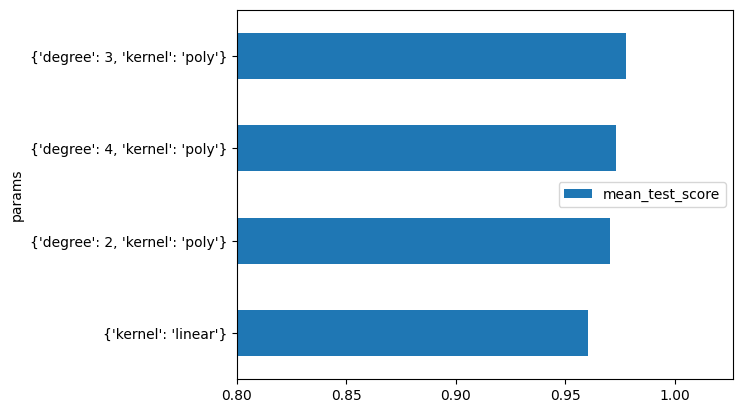

In [ ]:
# visualize the result
(results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=True).plot.barh(x='params', xlim=(0.8)))

In [ ]:
from sklearn import datasets, linear_model, model_selection
# load the data
diabetes = datasets.load_diabetes()
# target
y = diabetes.target
# features
X = diabetes.data

In [ ]:
# the first patient has index 0
print(y[0])

151.0


In [ ]:
# let's look at the first patients data
print(dict(zip(diabetes.feature_names, X[0])))

{'age': 0.038075906433423026, 'sex': 0.05068011873981862, 'bmi': 0.061696206518683294, 'bp': 0.0218723855140367, 's1': -0.04422349842444599, 's2': -0.03482076283769895, 's3': -0.04340084565202491, 's4': -0.002592261998183278, 's5': 0.019907486170462722, 's6': -0.01764612515980379}


Text(0, 0.5, 'P(alpha)')

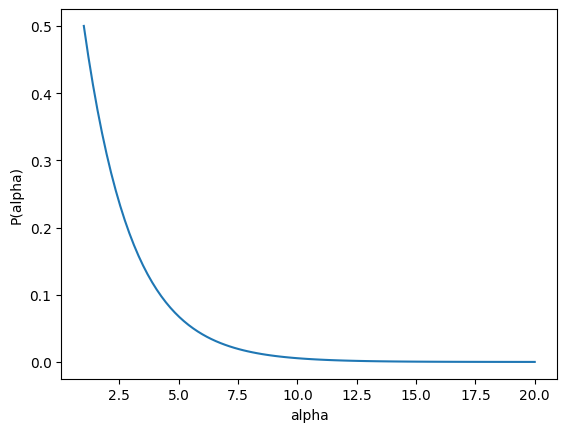

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# values of alpha
x = np.linspace(1, 20, 100)
# probabilities
p_X = stats.gamma.pdf(x=x, a=1, loc=1, scale=2)
plt.plot(x,p_X)
plt.xlabel('alpha')
plt.ylabel('P(alpha)')

In [ ]:
# n sample values
n_iter = 100
# sample from the gamma distribution
samples = stats.gamma.rvs(a=1, loc=1, scale=2, size=n_iter, random_state=100)

Text(0, 0.5, 'sample count')

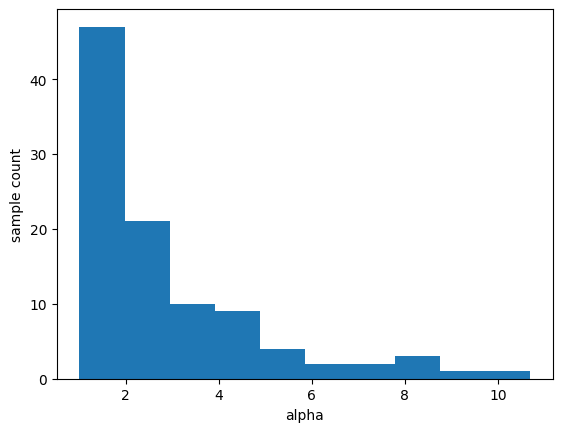

In [ ]:
# visualize the sample distribution
plt.hist(samples)
plt.xlabel('alpha')
plt.ylabel('sample count')

In [ ]:
# we will store the results inside a dictionary
result = {}
# for each sample
for sample in samples:
  reg = linear_model.Ridge(alpha=sample)
  cv = model_selection.cross_val_score(reg, X, y, cv=10,scoring='neg_mean_squared_error')
  # retain the result in the dictionary
  result[sample] = [cv.mean()]

In [ ]:
import pandas as pd
"""
convert the result dictionary to a pandas dataframe, 
transpose and reset the index
"""
df_result = pd.DataFrame(result).T.reset_index()
# give the columns sensible names
df_result.columns = ['alpha', 'mean_neg_mean_squared_error']
print(df_result.sort_values('mean_neg_mean_squared_error', ascending=False).head())

       alpha  mean_neg_mean_squared_error
4   1.009460                 -3368.577570
26  1.011409                 -3369.409125
29  1.030745                 -3377.634384
43  1.041302                 -3382.107803
34  1.074316                 -3396.017326


Text(0, 0.5, '-MSE')

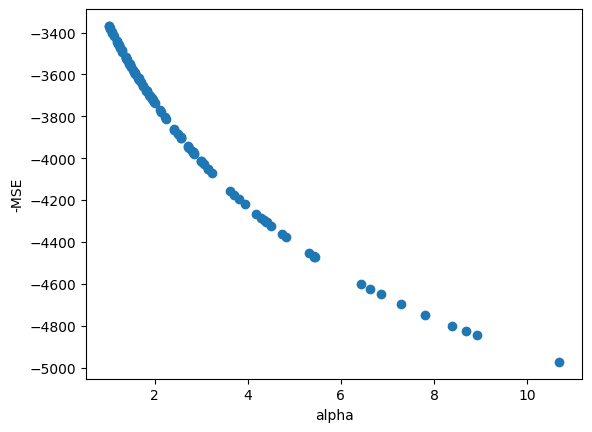

In [ ]:
plt.scatter(df_result.alpha,df_result.mean_neg_mean_squared_error)
plt.xlabel('alpha')
plt.ylabel('-MSE')

# RandomSearchCV

In [ ]:
from sklearn import datasets, model_selection, linear_model
# load the data
diabetes = datasets.load_diabetes()
# target
y = diabetes.target
# features
X = diabetes.data
# initialise the ridge regression
reg = linear_model.Ridge()

In [ ]:
reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [ ]:
?reg

In [ ]:
from scipy import stats
# alpha ~ gamma(1,1)
param_dist = {'alpha': stats.gamma(a=1, loc=1, scale=2)}

In [ ]:
"""
set up the random search to sample 100 values and 
score on negative mean squared error
"""
rscv = model_selection.RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error')
# start the search
rscv.fit(X,y)

RandomizedSearchCV(estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f036b58f340>},
                   scoring='neg_mean_squared_error')

In [ ]:
import pandas as pd
# convert the results dictionary to a pandas data frame
results = pd.DataFrame(rscv.cv_results_)
# show the top 5 hyperparamaterizations
print(results.loc[:,['params','rank_test_score']].sort_values('rank_test_score').head(5))

                           params  rank_test_score
25  {'alpha': 1.0058212115902405}                1
6    {'alpha': 1.010910759940542}                2
70  {'alpha': 1.0147013946084802}                3
45   {'alpha': 1.073779770488983}                4
9   {'alpha': 1.0966803213478762}                5


In [ ]:
from sklearn import datasets
# import data
digits = datasets.load_digits()
# target
y = digits.target
# features
X = digits.data

In [ ]:
from sklearn import ensemble
# an ensemble of 100 estimators
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=100)

In [ ]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# how many features do we have in our dataset?
n_features = X.shape[1]
print(n_features)

64


In [ ]:
from scipy import stats
"""
we would like to smaple from criterion and 
max_features as discrete uniform distributions
"""
param_dist = {'criterion': ['gini', 'entropy'],'max_features': stats.randint(low=1,high=n_features)}

In [ ]:
from sklearn import model_selection
"""
setting up the random search sampling 50 times and 
conducting 5-fold cross-validation
"""
rscv = model_selection.RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy' , random_state=100)

In [ ]:
rscv.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f036b4cb670>},
                   random_state=100, scoring='accuracy')

In [ ]:
import pandas as pd
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(rscv.cv_results_)
# removing duplication
distinct_results = results.loc[:,['params','mean_test_score']]
# convert the params dictionaries to string data types
distinct_results.loc[:,'params'] = distinct_results.loc[:,'params'].astype('str')
# remove duplicates
distinct_results.drop_duplicates(inplace=True)
# look at the top 5 best hyperparamaterizations
distinct_results.sort_values('mean_test_score',ascending=False).head(5)

,params,mean_test_score
3,"{'criterion': 'gini', 'max_features': 11}",0.940470
48,"{'criterion': 'gini', 'max_features': 4}",0.939913
19,"{'criterion': 'gini', 'max_features': 5}",0.937700
14,"{'criterion': 'gini', 'max_features': 3}",0.937694
21,"{'criterion': 'entropy', 'max_features': 8}",0.936582


<Axes: ylabel='params'>

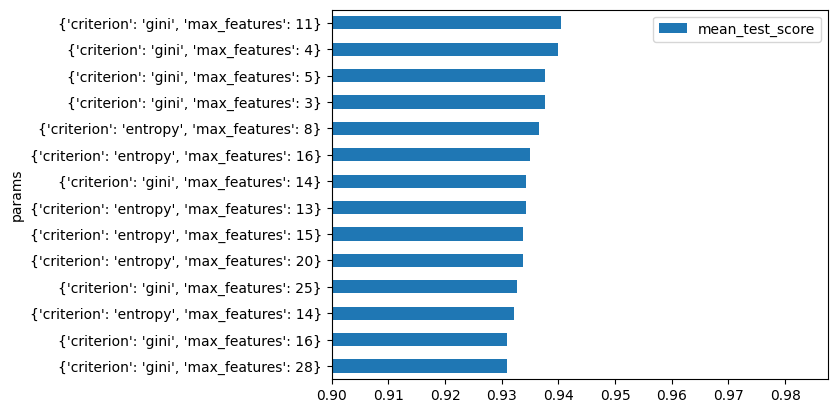

In [ ]:
# top performing models
distinct_results[distinct_results.mean_test_score > 0.93].sort_values('mean_test_score').plot.barh(x='params', xlim=(0.9))

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/fenago/datasets/main/water_potability.csv"
water_data = pd.read_csv(url)

# Display dataset info
print(water_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


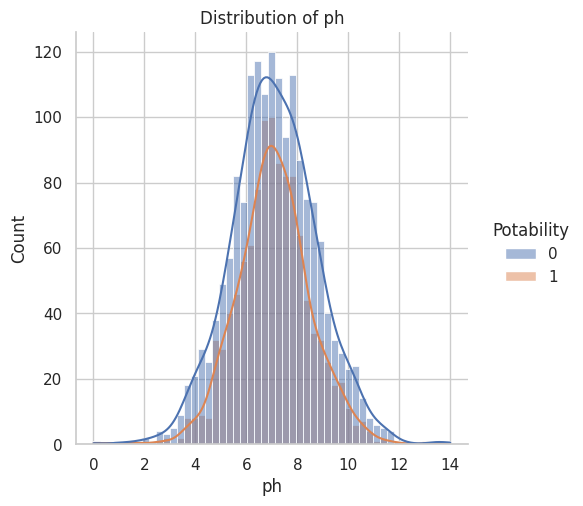

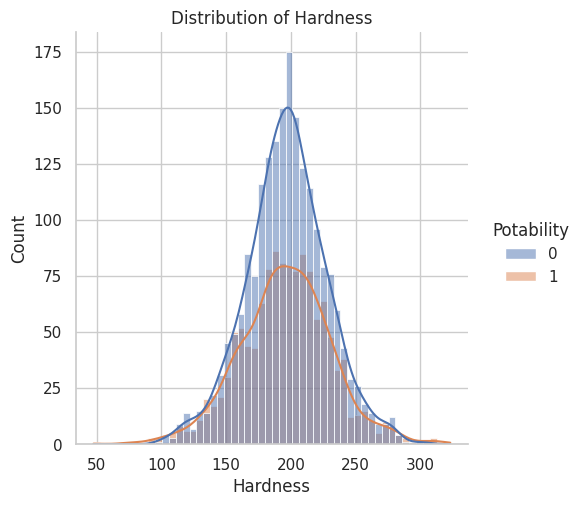

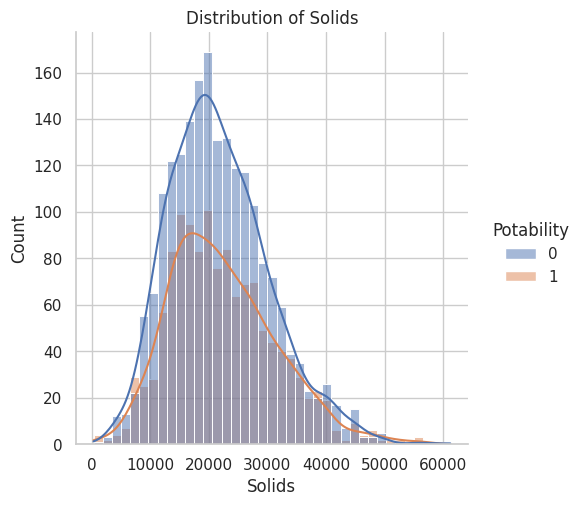

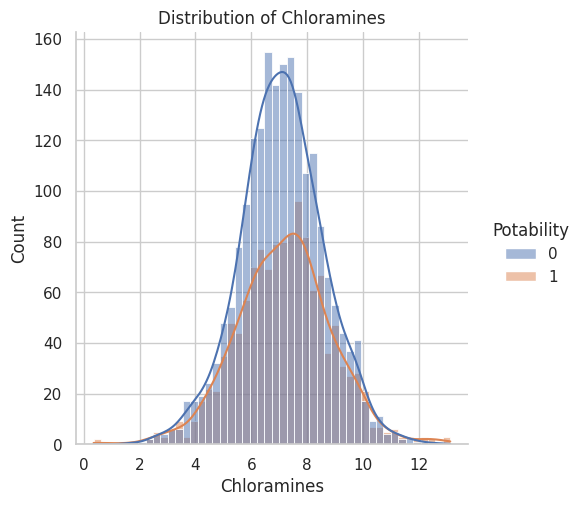

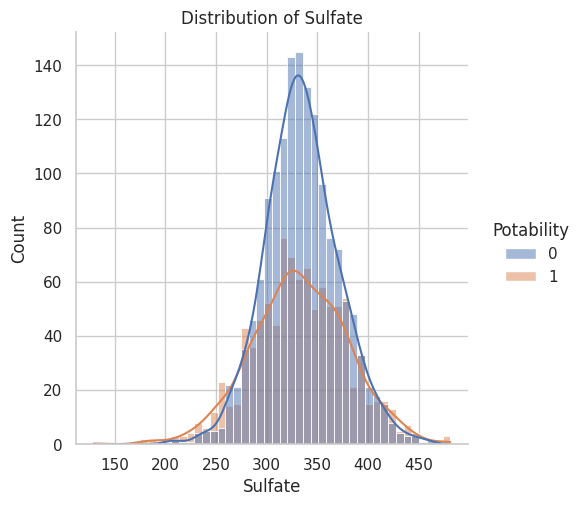

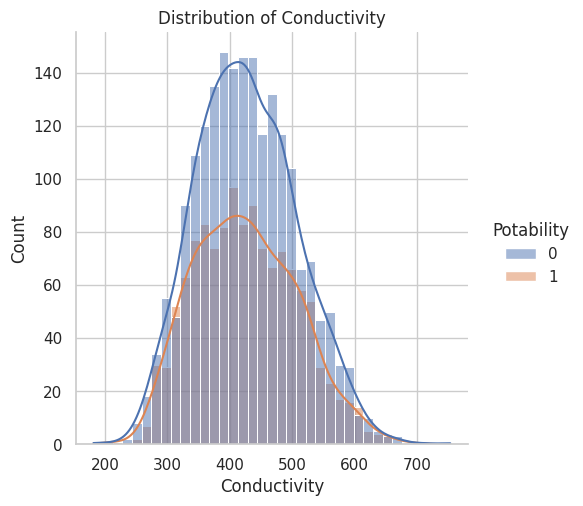

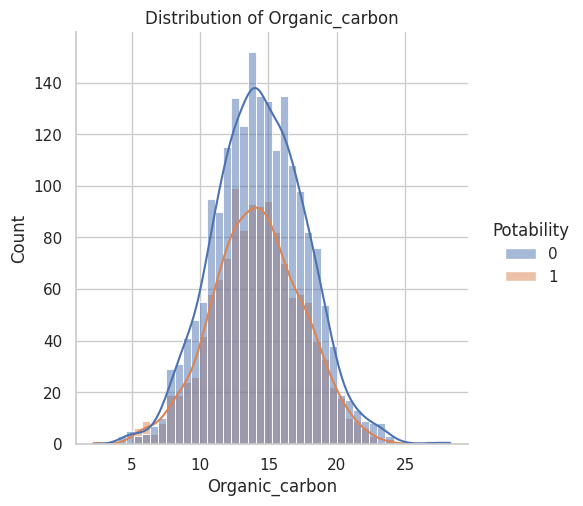

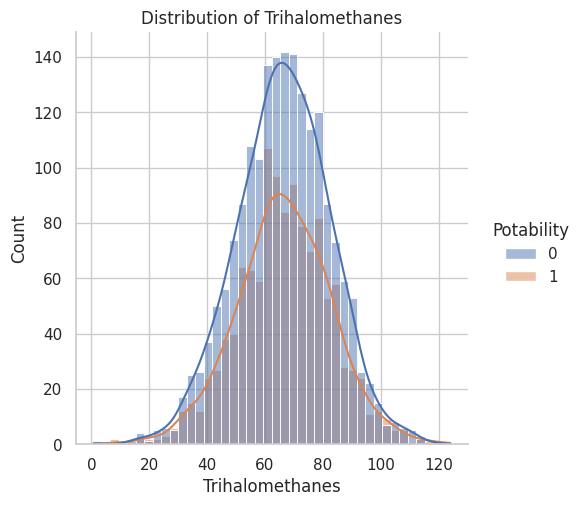

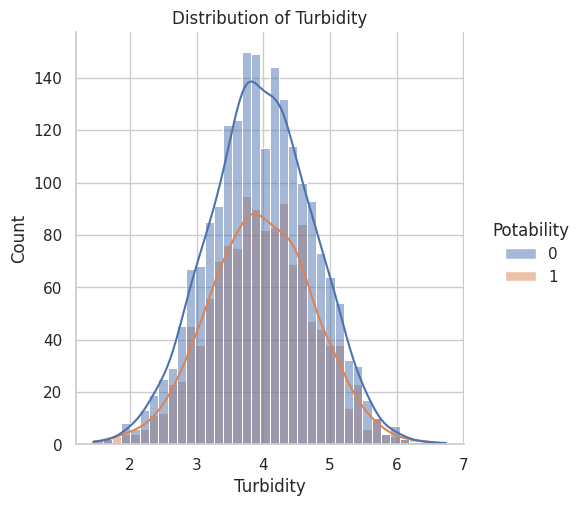

In [ ]:
# Visualize feature distributions
sns.set(style="whitegrid")
for col in water_data.columns[:-1]:
    sns.displot(data=water_data, x=col, hue="Potability", kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [ ]:
!pip install bayesian-optimization



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import xgboost as xgb
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score


# Handle missing values
water_data.fillna(water_data.mean(), inplace=True)

# Split the dataset into training and test sets
X = water_data.drop("Potability", axis=1)
y = water_data["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define function to compute cross-validated accuracy
def xgb_cv(n_estimators, max_depth, gamma, min_child_weight, subsample):
    model = xgb.XGBClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        random_state=42,
    )
    return np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy"))

# Define function to optimize XGBoost classifier using Bayesian Optimization
def optimize_xgb():
    def xgb_crossval(n_estimators, max_depth, gamma, min_child_weight, subsample):
        return xgb_cv(n_estimators, max_depth, gamma, min_child_weight, subsample)

    optimizer = BayesianOptimization(
        f=xgb_crossval,
        pbounds={
            "n_estimators": (100, 500),
            "max_depth": (3, 10),
            "gamma": (0, 1),
            "min_child_weight": (1, 10),
            "subsample": (0.5, 1),
        },
        random_state=42,
    )
    optimizer.maximize(n_iter=10)
    return optimizer.max

# Find optimal hyperparameters using Bayesian Optimization
best_params = optimize_xgb()['params']
print("Best hyperparameters found by Bayesian Optimization:", best_params)

# Train the XGBoost classifier with the best hyperparameters
best_xgb = xgb.XGBClassifier(
    n_estimators=int(best_params["n_estimators"]),
    max_depth=int(best_params["max_depth"]),
    gamma=best_params["gamma"],
    min_child_weight=best_params["min_child_weight"],
    subsample=best_params["subsample"],
    random_state=42,
)

best_xgb.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

print("Test set accuracy with best hyperparameters:", accuracy)
print("Test set F1-score with best hyperparameters:", f1)
print("Test set ROC-AUC score with best hyperparameters:", roc_auc)


|   iter    |  target   |   gamma   | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 1         | 0.6229    | 0.3745    | 9.655     | 7.588     | 339.5     | 0.578     |
| 2         | 0.6271    | 0.156     | 3.407     | 8.796     | 340.4     | 0.854     |
| 3         | 0.6218    | 0.02058   | 9.789     | 8.492     | 184.9     | 0.5909    |
| 4         | 0.6153    | 0.1834    | 5.13      | 5.723     | 272.8     | 0.6456    |
| 5         | 0.6279    | 0.6119    | 3.976     | 3.629     | 246.5     | 0.728     |
| 6         | 0.6344    | 0.5017    | 3.601     | 4.93      | 241.0     | 0.726     |
| 7         | 0.6092    | 0.4044    | 4.264     | 3.509     | 235.5     | 0.9064    |
| 8         | 0.6366    | 0.584     | 3.334     | 1.322     | 141.8     | 0.6166    |
| 9         | 0.6183    | 0.4686    | 9.951     | 9.297     | 272.7     | 0.6578    |
| 10        | 0.6256    | 0.8076    | 4.231     | 3.85

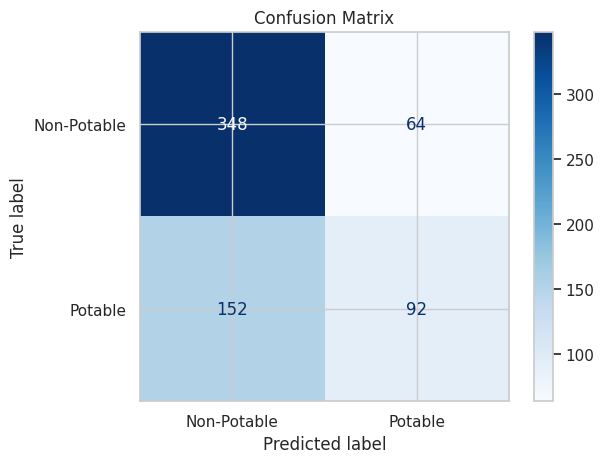

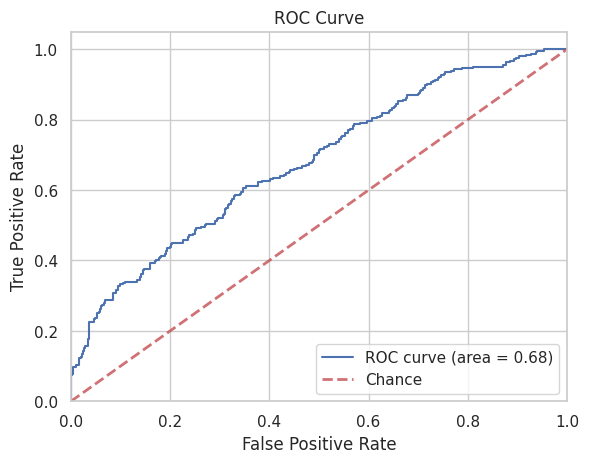

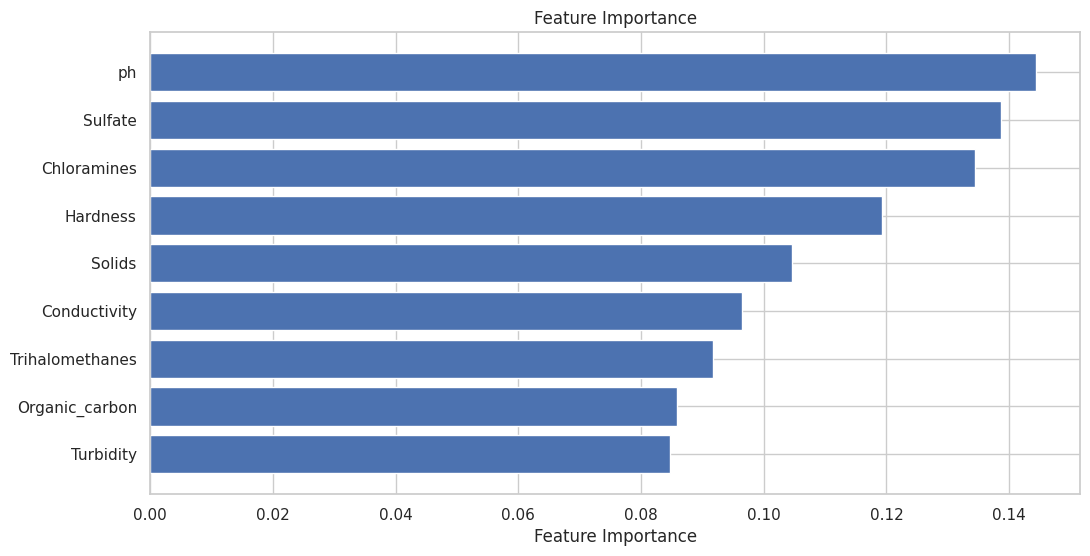

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Potable", "Potable"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Feature Importance Plot with actual feature names
feature_importance = best_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance")
plt.show()
